In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
nflx = pd.read_csv('nflx.us.txt', index_col='Date', parse_dates=True)

In [31]:
nflx.head()

,Open,High,Low,Close,Volume,OpenInt
Date,,,,,,
2005-02-25,1.5271,1.5829,1.5214,1.5700,29469293,0
2005-02-28,1.5829,1.5857,1.5000,1.5286,6607657,0
2005-03-01,1.5286,1.5643,1.5157,1.5414,4451881,0
2005-03-02,1.5429,1.5786,1.5143,1.5257,14459396,0
2005-03-03,1.5271,1.5557,1.5000,1.5086,7353878,0


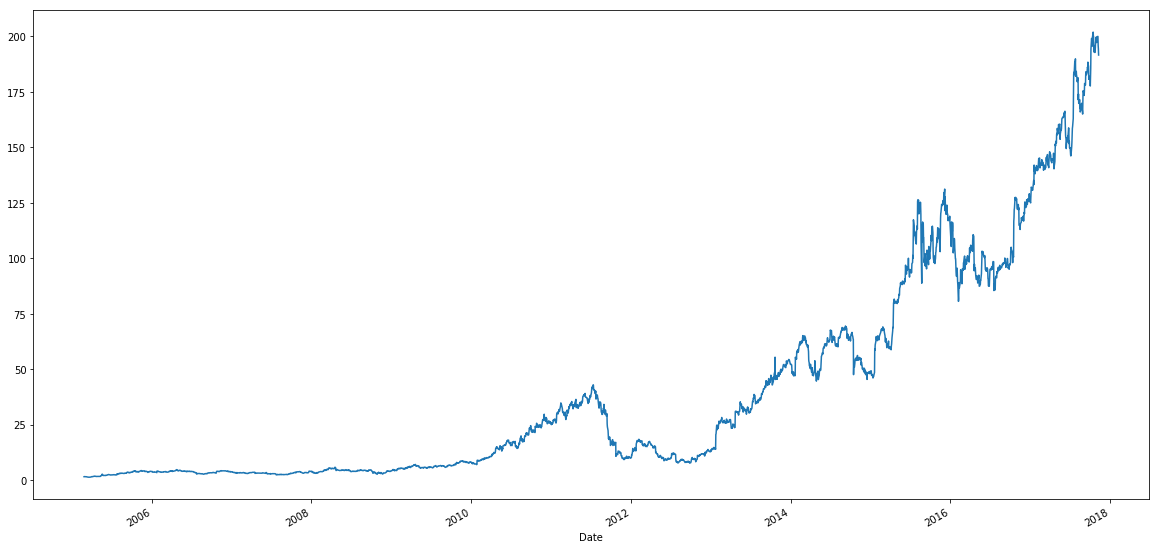

In [33]:
nflx['Open'].plot(figsize=(20,10))

In [34]:
nflx.rolling(7).mean().head(14)

,Open,High,Low,Close,Volume,OpenInt
Date,,,,,,
2005-02-25,NaN,NaN,NaN,NaN,NaN,NaN
2005-02-28,NaN,NaN,NaN,NaN,NaN,NaN
2005-03-01,NaN,NaN,NaN,NaN,NaN,NaN
2005-03-02,NaN,NaN,NaN,NaN,NaN,NaN
2005-03-03,NaN,NaN,NaN,NaN,NaN,NaN
2005-03-04,NaN,NaN,NaN,NaN,NaN,NaN
2005-03-07,1.535714,1.565314,1.507343,1.530829,10297098.0,0.0
2005-03-08,1.533471,1.555914,1.495300,1.513071,7184014.0,0.0
2005-03-09,1.513471,1.538371,1.479386,1.498986,7628818.0,0.0


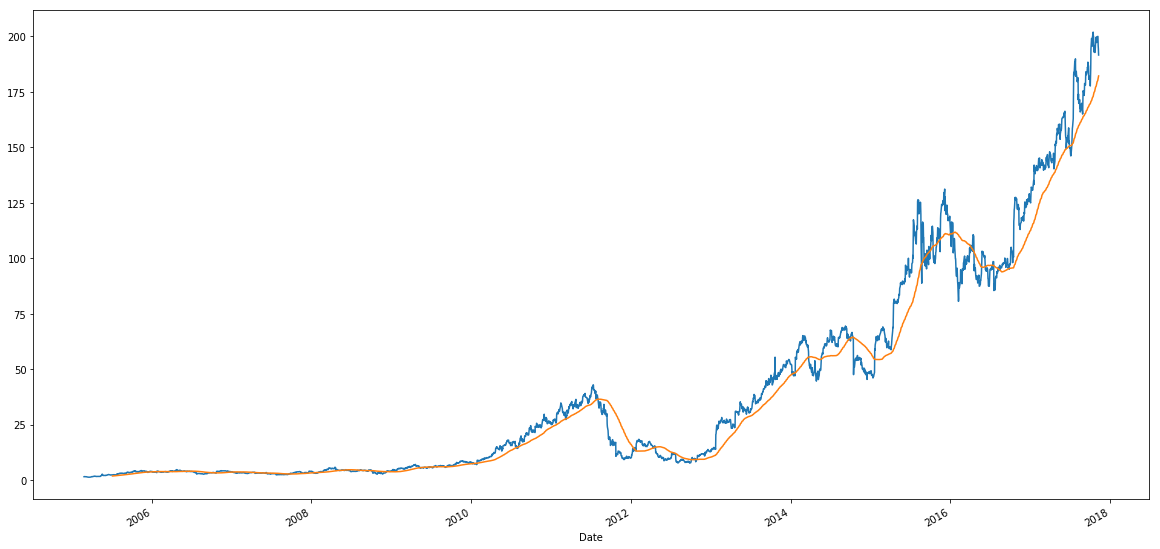

In [55]:
nflx['Open'].plot()
nflx.rolling(window=90).mean()['Close'].plot(figsize=(20,10))

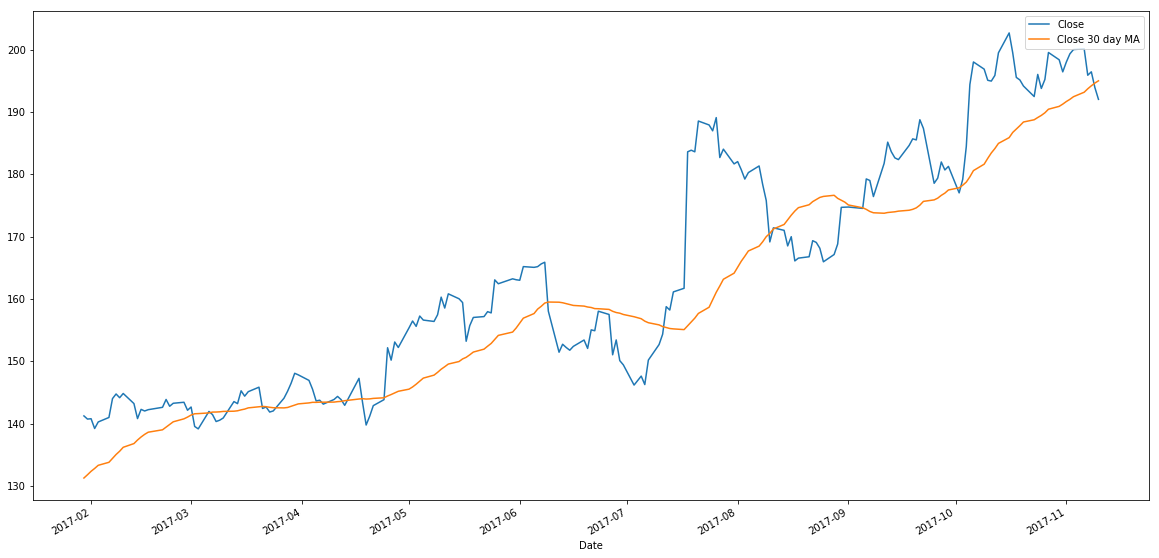

In [53]:
nflx['Close 30 day MA'] = nflx['Close'].rolling(window=30).mean()
nflx[['Close', 'Close 30 day MA', ]].tail(200).plot(figsize=(20,10))

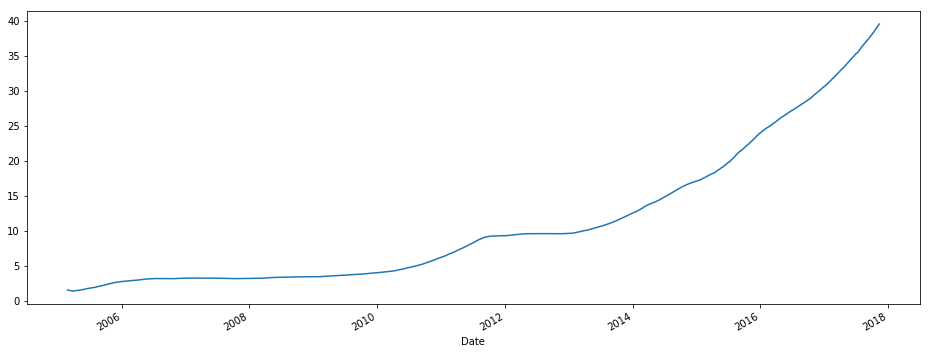

In [48]:
nflx['Close'].expanding().mean().plot(figsize=(16,6))

 # Bollinger Bands

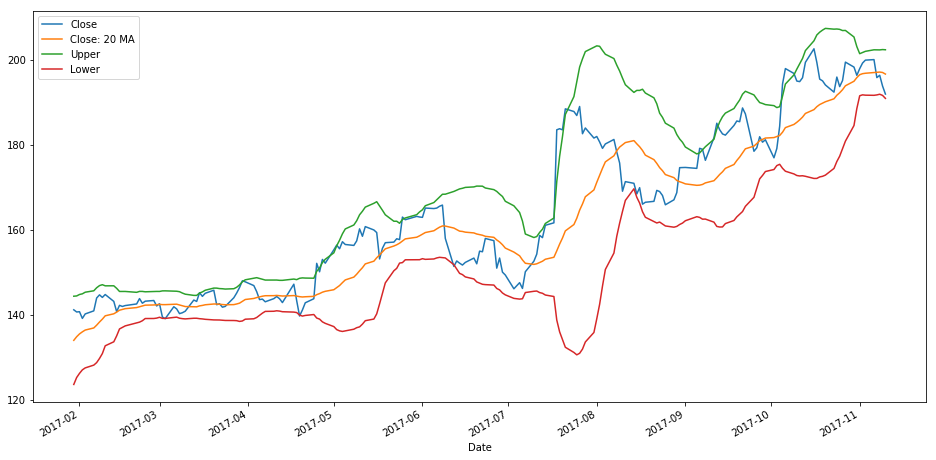

In [52]:
# Closing price 20 days MA
nflx['Close: 20 MA'] = nflx['Close'].rolling(window=20).mean()
# Upper bands = 20 MA + 2*std(20)
nflx['Upper'] = nflx['Close: 20 MA'] + 2*(nflx['Close'].rolling(window=20).std())
# Lower bands = 20 MA - 2*std(20)
nflx['Lower'] = nflx['Close: 20 MA'] - 2*(nflx['Close'].rolling(window=20).std())
# Close
nflx[['Close', 'Close: 20 MA', 'Upper', 'Lower']].tail(200).plot(figsize=(16,8))